## 4 The COMPAS Case

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
individuals = pd.read_csv('compas_preprocessed.csv')
individuals['correct'] = np.where(individuals['high_risk'] == individuals['two_year_recid'], 1, 0)
individuals

,race,decile_score,high_risk,two_year_recid,correct
0,Other,1,0,0,1
1,African-American,3,0,1,0
2,African-American,4,0,1,0
3,Other,1,0,0,1
4,Caucasian,6,1,1,1
...,...,...,...,...,...
6167,African-American,7,1,0,0
6168,African-American,3,0,0,1
6169,Other,1,0,0,1
6170,African-American,2,0,0,1


**(a)**

Based on the histogram plotted below, we can see that caucasians are much more often classified as low risk.
Another finding is that the risk score of african-american people is relatively balanced.

In [104]:
aa = individuals[individuals['race'] == 'African-American']
cc = individuals[individuals['race'] == 'Caucasian']

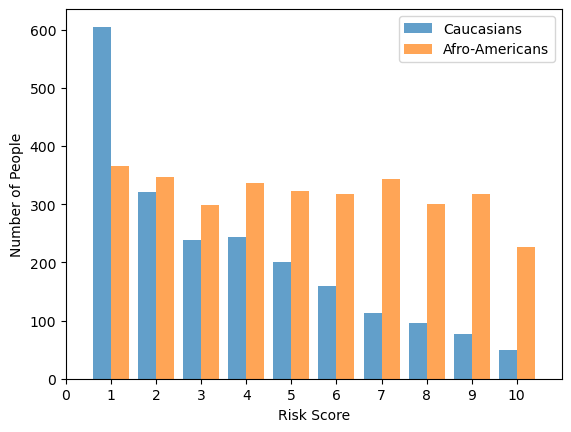

In [105]:
bins = np.arange(12) - 0.5
plt.hist([cc.decile_score, aa.decile_score], alpha=0.7, bins=bins, label=['Caucasians','Afro-Americans'])
plt.xlabel('Risk Score')
plt.ylabel('Number of People')
plt.legend(loc='upper right')
plt.xticks(range(11))
plt.xlim([0, 11])
plt.show()

**(b)**


822 out of 2103 or 39.09 percent caucasians are rearrested within 2 years.


1661 out of 3175 or 52.31 percent afro-americans are rearrested within 2 years.

In [106]:
print(len(cc[cc['two_year_recid'] == 1]), 'out of', len(cc), 'or', 
      np.round(len(cc[cc['two_year_recid'] == 1]) / len(cc) * 100, 2), 'percent caucasians are rearrested within 2 years.')
print(len(aa[aa['two_year_recid'] == 1]), 'out of', len(aa), 'or', 
      np.round(len(aa[aa['two_year_recid'] == 1]) / len(aa) * 100, 2), 'percent afro-americans are rearrested within 2 years.')

822 out of 2103 or 39.09 percent caucasians are rearrested within 2 years.
1661 out of 3175 or 52.31 percent afro-americans are rearrested within 2 years.


**(c)**

822 caucasians have been rearrested from an estimated 696 . The error ratio is: 126 people or 15.33 percent.


1661 afro-americans have been rearrested from an estimated 1829 . The error ratio is: 168 people or 10.11 percent.


The graphs show, that for both caucasians and afro-americans the error ration is < 15%. It is interesting that it is **5% lower** for african-americans than for caucasians.
As a conclusion I would claim that the prediction model works almost the same.

822 caucasians have been rearrested from an estimated 696 . The error ratio is: 126 people or 15.33 percent.


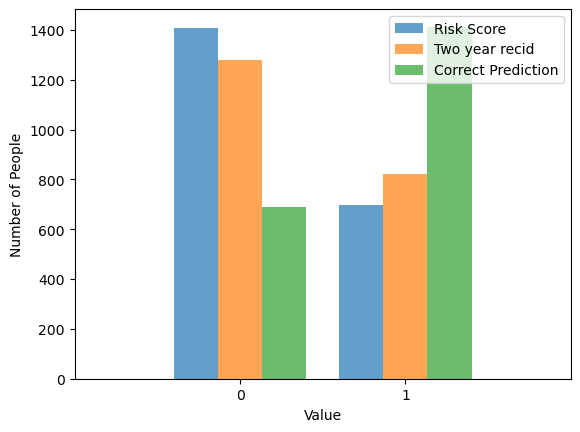

In [107]:
print(len(cc[cc['two_year_recid'] == 1]), 'caucasians have been rearrested from an estimated', len(cc[cc['high_risk'] == 1]), '.', 
      'The error ratio is:', abs(len(cc[cc['two_year_recid'] == 1]) - len(cc[cc['high_risk'] == 1])), 'people or',
      np.round(np.mean(abs((len(cc[cc['two_year_recid'] == 1]) - len(cc[cc['high_risk'] == 1])) / len(cc[cc['two_year_recid'] == 1]))) * 100, 2), 'percent.')

bins = np.arange(3) - .5
plt.hist([cc.high_risk, cc.two_year_recid, cc.correct], alpha=0.7, bins=bins, label=['Risk Score','Two year recid', 'Correct Prediction'])
plt.xlabel('Value')
plt.ylabel('Number of People')
plt.legend(loc='upper right')
plt.xticks(range(2))
plt.xlim([-1, 2])
plt.show()

1661 afro-americans have been rearrested from an estimated 1829 . The error ratio is: 168 people or 10.11 percent.


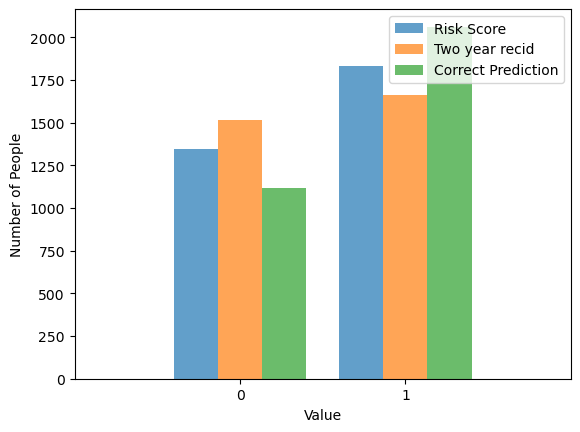

In [109]:
print(len(aa[aa['two_year_recid'] == 1]), 'afro-americans have been rearrested from an estimated', len(aa[aa['high_risk'] == 1]), '.', 
      'The error ratio is:', abs(len(aa[aa['two_year_recid'] == 1]) - len(aa[aa['high_risk'] == 1])), 'people or',
      np.round(np.mean(abs((len(aa[aa['two_year_recid'] == 1]) - len(aa[aa['high_risk'] == 1])) / len(aa[aa['two_year_recid'] == 1]))) * 100, 2), 'percent.')

bins = np.arange(3) - .5
plt.hist([aa.high_risk, aa.two_year_recid, aa.correct], alpha=0.7, bins=bins, label=['Risk Score','Two year recid', 'Correct Prediction'])
plt.xlabel('Value')
plt.ylabel('Number of People')
plt.legend(loc='upper right')
plt.xticks(range(2))
plt.xlim([-1, 2])
plt.show()

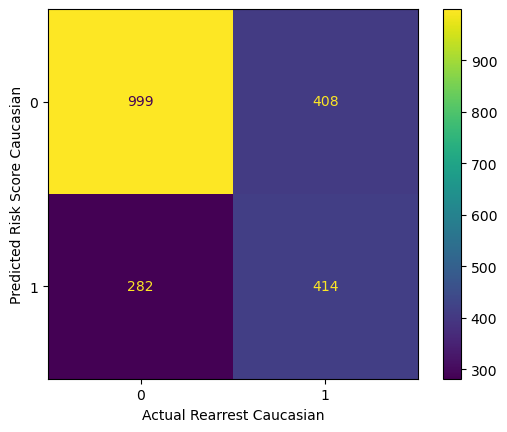

In [118]:
from sklearn import metrics

confusion_matrix_cc = metrics.confusion_matrix(cc['two_year_recid'], cc['high_risk'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cc.T)
cm_display.plot()
cm_display.ax_.set(ylabel="Predicted Risk Score Caucasian")
cm_display.ax_.set(xlabel="Actual Rearrest Caucasian")
plt.show()

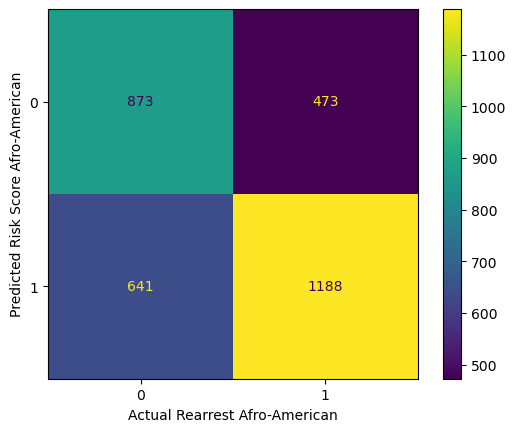

In [119]:
from sklearn import metrics

confusion_matrix_aa = metrics.confusion_matrix(aa['two_year_recid'], aa['high_risk'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_aa.T)
cm_display.plot()
cm_display.ax_.set(ylabel="Predicted Risk Score Afro-American")
cm_display.ax_.set(xlabel="Actual Rearrest Afro-American")
plt.show()

**(f)**

The false positive rate for caucasians is: 0.29 <br>
The false positive rate for afro-americans is: 0.35 <br>
This means that **more afro-american** who are being predicted as **risk** are **not rearrested** than caucasians.

In [125]:
def false_positive_rate(cm):
    return {'title': 'False positive rate', 
            'val': np.round(cm[1][0] / (cm[0][0] + cm[1][0]), 2)}
print('The false positive rate for caucasians is:', false_positive_rate(confusion_matrix_cc)['val'])
print('The false positive rate for afro-americans is:', false_positive_rate(confusion_matrix_aa)['val'])


The false positive rate for caucasians is: 0.29
The false positive rate for afro-americans is: 0.35


**(g)**

The false negative rate for caucasians is: 0.41 <br>
The false negative rate for afro-americans is: 0.35 <br>
This means that **more caucasians** who are being predicted as **no risk** are **rearrested** than caucasians.

In [124]:
def false_negative_rate(cm):
    return {'title': 'False negative rate', 
            'val': np.round(cm[0][1] / (cm[0][1] + cm[1][1]), 2)}
print('The false negative rate for caucasians is:', false_negative_rate(confusion_matrix_cc)['val'])
print('The false negative rate for afro-americans is:', false_negative_rate(confusion_matrix_aa)['val'])

The false negative rate for caucasians is: 0.41
The false negative rate for afro-americans is: 0.35
